In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container



In [2]:
Num_Points = 0
Title     = 'Synthetic Regression LIME 2'
Sampling  = 'std_t'
N_samples = 2000


In [3]:
# Load Forrester model

Reg_Data = BB_Model(dataset = 'Synthetic_Reg', Feature_Counts=[16,12])

#Reg_Data.df().head()

In [4]:
Reg_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4061009602501072


MLPRegressor(random_state=RandomState(MT19937) at 0x21A7E959840)

In [5]:
Reg_Data.Random_Forest()

0.3552552927970616


RandomForestRegressor(random_state=RandomState(MT19937) at 0x21A7E959840)

In [6]:
Reg_Data.GP()

-0.08434570843545575


GaussianProcessRegressor()

In [7]:
print(Reg_Data.get_features())

['Passive_0', 'Passive_1', 'Active_2', 'Active_3', 'Active_4', 'Active_5', 'Active_6', 'Active_7']


In [8]:
#Default settings
from LIME_2.lime_2 import LIME_Model

X_train, X_test, y_train, y_test = Reg_Data.get_TT_data()

#Initializing the explainer object
LIME_Exp = LIME_Model(bbox_model           = Reg_Data.get_Random_Forest(),
                      train_data           = X_train,
                      feature_names        = Reg_Data.get_features(),
                      categorical_features = Reg_Data.get_catagorical(),
                      mode                 = Reg_Data.get_mode(),
                      sampling             = Sampling)


In [9]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [ 10.81943751  16.93153921  11.94961119  17.39126789   8.28310927
  19.51109637 -10.88742358  18.28407366]
Std 0:  [4.06252725 2.1478374  5.30679063 3.77896813 4.57198816 1.23640337
 3.38843831 3.79556699]


In [10]:
# Generate explantion data for Random Forest

Reg_Stats = Feature_Statistics(feature_names = Reg_Data.get_features(),
                               mode          = Reg_Data.get_mode(),
                               uncert_pr     = False)

if Num_Points > X_test.shape[0]: Num_Points = X_test.shape[0]

elif Num_Points == 0:            Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
#    data_row  = np.array([0.4])

#    print('data row ',data_row)
    
    LIME_Exp.explain(X_init                 = data_row.reshape(1, -1),
                     sample_around_instance = True,
                     bounds                 = 1,
                     LHC_strength           = 1,
                     Student_T_DF           = 1,
                     N_samples              = N_samples)
       
    f_predict = Reg_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = LIME_Exp.exp_predict(data_row.reshape(1, -1))
    e_predict = np.array(e_predict).ravel()
       
    print(f_predict, e_predict)
    
    scores = LIME_Exp.get_LIME_scores()
    
    Reg_Stats.Add_Sample(sample_scores = scores,
                         outcome       = y_test[test_instance],
                         X_row         = data_row.reshape(1, -1),
                         f_prediction  = f_predict,
                         e_prediction  = e_predict.ravel(),
                         feopt         = None,
                         model         = LIME_Exp.get_exp_model())


INSTANCE:  0
[-1.95816818] [-3.52116038]
INSTANCE:  1
[2.2719417] [-1.0020271]
INSTANCE:  2
[-13.91201863] [-3.57210502]
INSTANCE:  3
[24.72715737] [26.3695887]
INSTANCE:  4
[-67.49373261] [-61.91247424]
INSTANCE:  5
[-94.34514552] [-48.99869031]
INSTANCE:  6
[-61.0810525] [-59.3990117]
INSTANCE:  7
[107.96787577] [45.58233847]
INSTANCE:  8
[-89.11999417] [-65.37199263]
INSTANCE:  9
[-30.59885287] [-43.62861629]
INSTANCE:  10
[-2.14914279] [-11.09687807]
INSTANCE:  11
[-87.01924996] [-70.6352464]
INSTANCE:  12
[-34.6801097] [-42.13853778]
INSTANCE:  13
[-4.11226957] [-19.87425479]
INSTANCE:  14
[-112.9788705] [-99.94865345]
INSTANCE:  15
[64.96932587] [51.4746509]
INSTANCE:  16
[7.4143821] [9.41209554]
INSTANCE:  17
[-61.63755072] [-39.89730818]
INSTANCE:  18
[-86.11723996] [-31.09401716]
INSTANCE:  19
[-41.54598215] [-59.70133838]
INSTANCE:  20
[69.71994423] [47.60276228]
INSTANCE:  21
[2.88298455] [-11.07208028]
INSTANCE:  22
[10.41198764] [25.90096989]
INSTANCE:  23
[-116.28026569] 

In [11]:
import matplotlib.pyplot as plt


In [12]:
print(f_predict)
print(e_predict)


[-141.37174055]
[-96.96186725]


In [13]:
Reg_Stats.Feature_Counts(max_features=20, scaled=True, threshold=0.05)


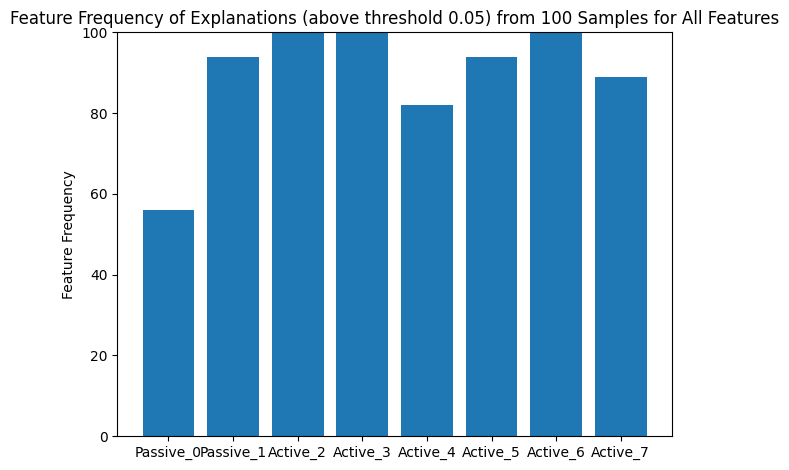

In [14]:
Reg_Stats.Frequency_Plot()


In [15]:
Reg_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           50.00842117378561  :  1869.7086775487  :  187.03457327761402
y - exp(x):          50.79661010665782  :  1583.2042405070765  :  167.60208018038605
BB(x) - exp(x):      20.361832714330387  :  289.55953510440804  :  83.0181415591612


In [16]:
Reg_Stats.Jaccard_Values()

Mean Jaccard Similarity:  0.9488792688792689
Mean Jaccard Distance:    0.05112073112073113


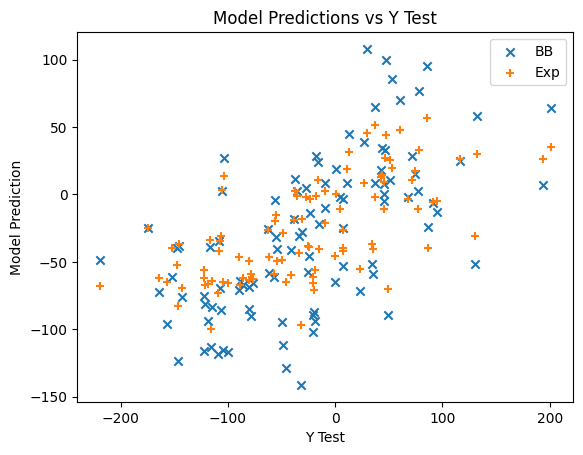

In [17]:
Reg_Stats.Reg_Fidelity_Graph()

top_features True
top_features (100, 8)


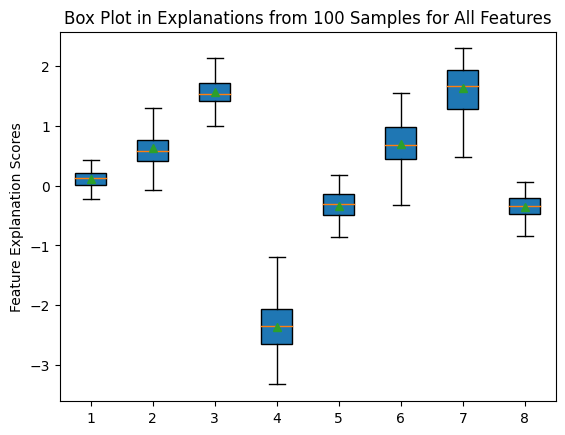

1 -      Passive_0
2 -      Passive_1
3 -      Active_2
4 -      Active_3
5 -      Active_4
6 -      Active_5
7 -      Active_6
8 -      Active_7


In [18]:
Reg_Stats.Box_Plot()


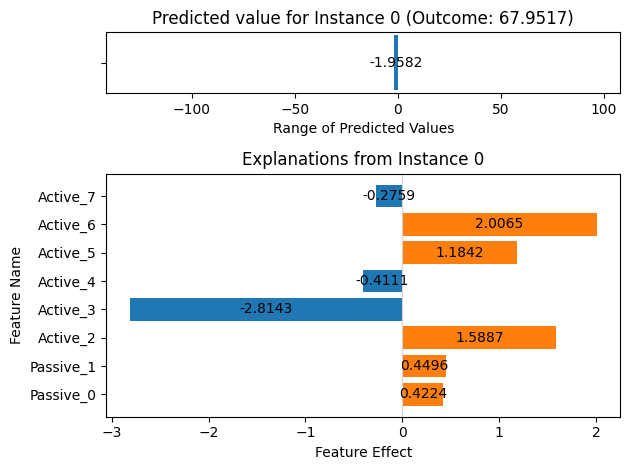

In [19]:
Reg_Stats.View_Explanation(instance = 0)

In [20]:
scores = LIME_Exp.permutation_importance()
    


In [21]:
scores_d1 = LIME_Exp.del_1_rel()

print(scores_d1)

[1.10777430e-02 7.60897599e-01 7.57192675e-01 6.10303823e+00
 1.64988688e-03 4.84237253e-03 1.68673169e-01 1.92628324e-01]


In [22]:
scores_d2 = LIME_Exp.del_2_rel()

print(scores_d2)

[4.04475978e-04 1.09848754e-03 7.61584092e+00 4.75302438e-02
 8.71088091e-04 4.25488659e-04 3.33293616e-01 5.35682322e-04]


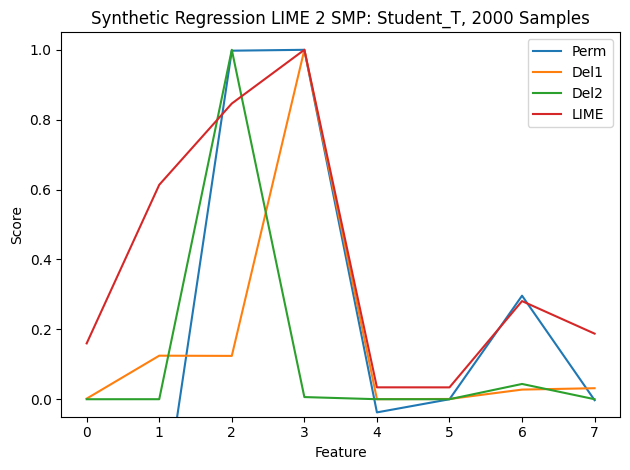

In [23]:
LIME_Exp.plot_scores(Title)